<a href="https://colab.research.google.com/github/siquette/IAD-004-2025-2/blob/main/PECE_AP1_Exercicios_PCA_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import decomposition
from sklearn import cluster
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib as mpl
import matplotlib.pyplot as plt
import urllib.request as request
import io
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg
%matplotlib inline

# Análise de Componentes Principais

Seja $X_{n \times m}$ um conjunto de $n$ dados com dimensão $m$.


O vetor médio do conjunto $X$ é um vetor de $m$ componentes que são dadas por:
\begin{equation}
\bar{X}_i = \frac{1}{n}\sum_{k=1}^n X_{k, i}
\end{equation}

A *matriz de covariância* do conjunto de dados $X$ é dada por:

\begin{equation}
\mbox{cov}\left[X, X\right]_{i,j} = \frac{1}{n}\sum_{k=1}^n (X_{k,i}-\bar{X_i})(X_{k,j}-\bar{X_j})
\end{equation}

Em particular, o *traço* desta matriz, ou seja, a soma dos componentes de sua diagonal principal, é o valor médio da distância ao quadrado dos pontos em $X$ ao ponto médio.

Nota-se que esta é uma matriz simétrica e positiva semi-definida.

A dimensão $m$ é frequentemente *redundante*, ou seja, seria possível descrever um ponto do conjunto por uma quantidade menor de parâmetros.

Suponha uma transformação linear $W_{l \times m}$ com $l<m$ que transforma um ponto no espaço de dimensão $m$ para um ponto no espaço de dimensão $l$. Os pontos se transformam com $Y_i = W (X_i - \bar{X})$.

É razoável supor que a transformação que captura o *máximo* de informação sobre $X_{n \times m}$ é a que produz o conjunto de dados $Y_{n \times l}$ com *máxima* covariância em suas colunas.

Tal transformação pode ser obtida pelos primeiros $l$ componentes (ordenados em ordem decrescente de autovalores) da *decomposição espectral* da matriz $\mbox{cov}\left[X, X\right]$.

De fato, pelo teorema espectral, toda matriz real simétrica positiva $m\times m$ tem $m$ autovalores positivos e todos os seus autovetores são ortogonais.

A matriz $W$ é assim formada pelos primeiros $l$ componentes de tal decomposição.

Deste modo, é possível reduzir um vetor com $m$ componentes para um vetor com $l$ componentes retendo-se o *máximo* de informação.





## Exercício 1: PCA com valores sintéticos**

É gerada uma nuvem de pontos $x,y$ a partir da distribuição multinormal centrada em (2,1) com matriz de covariância
\begin{equation}
\begin{bmatrix}6 & 5\\
5 & 6\end{bmatrix}
\end{equation}



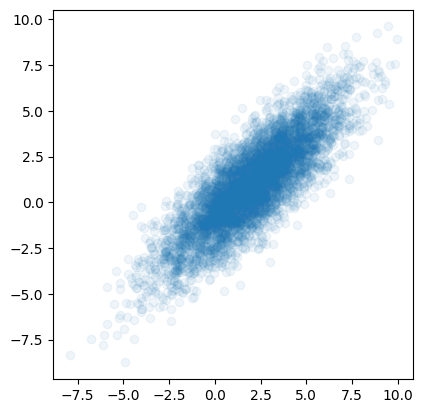

In [2]:
plt.axes().set_aspect('equal')
data = np.random.multivariate_normal([2,1], [[6,5],[5,6]], 5000)
plt.scatter(data[:,0], data[:,1], alpha=0.0675)

A matriz de covariância claramente tem autovalores distintos.
De fato, seus autovalores são 11 e 1, correspondentes aos autovetores $(1,1)$ e $(1,-1)$.

Observa-se que os pontos estão próximos da reta paralela ao vetor correspondente ao *maior* autovalor e que passa por $(2,1)$, ou seja, $y=x-1$.

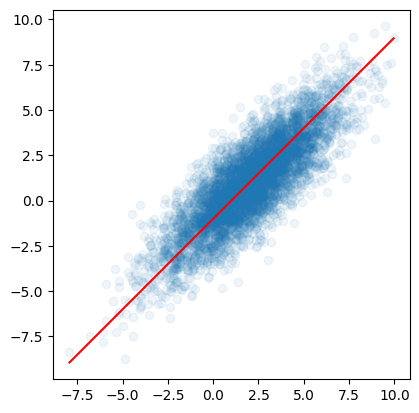

In [3]:
plt.axes().set_aspect('equal')
x_line = np.linspace(data[:,0].min(), data[:,0].max(),2)
y_line  = x_line -1
plt.scatter(data[:,0], data[:,1], alpha=0.0675)
plt.plot(x_line, y_line, color='r')

## a) Estatísticas da população.

Calcule o ponto médio e a matriz de covariância do conjunto de dados em ```data```. Compare com o ponto médio e a matriz de covariância do enunciado.

Calcule o traço desta matriz.

*Sugestão*: Você pode calcular a matriz usando a definição acima. Note que a biblioteca ```numpy``` possui a função ```cov``` que calcula matrizes de covariância de uma população quando os pontos estão organizados em *colunas* (não é o caso de ```data```!). Para tanto, passe o parâmetro ```bias=True``` (O padrão ```False``` estima a covariância de uma amostra).

In [4]:
media_teorica = [2, 1]
cov_teorica = [[6, 5], [5, 6]]
n_amostras = 5000


data = np.random.multivariate_normal(media_teorica, cov_teorica, n_amostras)


ponto_medio_calculado = np.mean(data, axis=0)


matriz_covariancia_calculada = np.cov(data.T, bias=True)

# --- 4. Comparação com os Valores Teóricos ---
print("--- Análise Estatística dos Dados Gerados ---")
print(f"Número de Amostras: {n_amostras}\n")

print("--- Ponto Médio ---")
print(f"Ponto Médio Teórico (População): {media_teorica}")
print(f"Ponto Médio Calculado (Amostra): {ponto_medio_calculado}\n")

print("--- Matriz de Covariância ---")
print(f"Matriz de Covariância Teórica (População):\n{np.array(cov_teorica)}\n")
print(f"Matriz de Covariância Calculada (Amostra):\n{matriz_covariancia_calculada}\n")

# --- 5. Cálculo do Traço da Matriz de Covariância ---
# O traço é a soma dos elementos da diagonal principal.
traco_calculado = np.trace(matriz_covariancia_calculada)
traco_teorico = np.trace(cov_teorica)

print("--- Traço da Matriz de Covariância ---")
print(f"O traço teórico é a soma da diagonal principal da matriz de covariância teórica: {cov_teorica[0][0]} + {cov_teorica[1][1]} = {traco_teorico}")
print(f"O traço da matriz de covariância calculada é: {traco_calculado:.4f}")

--- Análise Estatística dos Dados Gerados ---
Número de Amostras: 5000

--- Ponto Médio ---
Ponto Médio Teórico (População): [2, 1]
Ponto Médio Calculado (Amostra): [1.97463041 0.98652255]

--- Matriz de Covariância ---
Matriz de Covariância Teórica (População):
[[6 5]
 [5 6]]

Matriz de Covariância Calculada (Amostra):
[[6.11611266 5.08179089]
 [5.08179089 6.07057222]]

--- Traço da Matriz de Covariância ---
O traço teórico é a soma da diagonal principal da matriz de covariância teórica: 6 + 6 = 12
O traço da matriz de covariância calculada é: 12.1867


# b) Análise de componentes principais
O objeto ```PCA``` da biblioteca ```sklearn``` faz a decomposição em componentes principais de uma amostra.

O seu construtor tem a sintaxe ```decomposition.PCA()```.
O parâmetro opcional ```n_components``` especifica a quantidade de componentes a ser obtida na decomposição.
Se omitido, ele retorna o mínimo entre a quantidade de pontos da amostra e a dimensão da amostra.

Um conjunto de dados pode ser decomposto com o método ```fit(dados)``` onde ```dados``` é uma matriz cujas linhas são pontos do espaço amostral.

O objeto retornado possui os atributos ```mean_``` com o ponto médio, ```components_``` com uma matriz cujas linhas são os autovetores da matriz de covariância e ```explained_variance_``` que corresponde aos autovalores da matriz de covariância dos dados.

Obtenha a decomposiçào em componentes principais do conjunto de dados ```data``` com dimensão 2.
Note que neste caso é desnecessário passar o parâmetro ```n_components```.

Compare o ponto médio com o obtido no item a).
Compare a *soma* dos valores de ```explained_variance_``` com o traço da matriz obtida em a).
Finalmente, compare os autovetores e autovalores com os do enunciado.

In [5]:
np.random.seed(42)


media_teorica = [2, 1]
cov_teorica = [[6, 5], [5, 6]]
n_amostras = 5000

data = np.random.multivariate_normal(media_teorica, cov_teorica, n_amostras)


ponto_medio_calculado = np.mean(data, axis=0)


matriz_covariancia_calculada = np.cov(data.T, bias=True)


print("--- Análise Estatística dos Dados Gerados ---")
print(f"Número de Amostras: {n_amostras}\n")

print("--- Ponto Médio ---")
print(f"Ponto Médio Teórico (População): {media_teorica}")
print(f"Ponto Médio Calculado (Amostra): {ponto_medio_calculado}\n")

print("--- Matriz de Covariância ---")
print(f"Matriz de Covariância Teórica (População):\n{np.array(cov_teorica)}\n")
print(f"Matriz de Covariância Calculada (Amostra):\n{matriz_covariancia_calculada}\n")


traco_calculado = np.trace(matriz_covariancia_calculada)
traco_teorico = np.trace(cov_teorica)

print("--- Traço da Matriz de Covariância ---")
print(f"O traço teórico é a soma da diagonal principal da matriz de covariância teórica: {cov_teorica[0][0]} + {cov_teorica[1][1]} = {traco_teorico}")
print(f"O traço da matriz de covariância calculada é: {traco_calculado:.4f}")

--- Análise Estatística dos Dados Gerados ---
Número de Amostras: 5000

--- Ponto Médio ---
Ponto Médio Teórico (População): [2, 1]
Ponto Médio Calculado (Amostra): [2.01085909 1.01158466]

--- Matriz de Covariância ---
Matriz de Covariância Teórica (População):
[[6 5]
 [5 6]]

Matriz de Covariância Calculada (Amostra):
[[6.01936525 5.03739162]
 [5.03739162 6.06799392]]

--- Traço da Matriz de Covariância ---
O traço teórico é a soma da diagonal principal da matriz de covariância teórica: 6 + 6 = 12
O traço da matriz de covariância calculada é: 12.0874


## c) Redução dimensional por PCA

Como visto, os autovetores não são idênticos.
Suponha que queira-se reduzir a dimensão dos pontos de ```data``` a uma *única* dimensão retendo-se o *máximo* de informação.

Para tanto passe o parâmetro ```n_components=1``` no construtor de ```PCA``` e crie uma nova decomposição de ```data``` com o método ```fit```.

Os pontos no novo espaço de dimensão reduzida (neste caso 1) são obtidos a partir de pontos no espaço original com o método ```transform``` (naturalmente aqui há alguma perda de informação).
Um ponto do espaço original pode ser obtido a partir do espaço reduzido com o método ```inverse_transform```.

Projete os pontos de ```data``` no espaço reduzido e projete-os novamente no espaço original.
Plote de forma sobreposta os dados originais e os dados reduzidos e reprojetados.

Calcule a distância quadrática média entre um ponto em ```data``` e o seu equivalente, projetado no espaço reduzido e posteriormente restaurado.
Compare com o último componente de ```explained_variances_``` do item b).

In [7]:
import numpy as np
from sklearn.decomposition import PCA


np.random.seed(42)
media_teorica = [2, 1]
cov_teorica = [[6, 5], [5, 6]]
n_amostras = 5000
data = np.random.multivariate_normal(media_teorica, cov_teorica, n_amostras)


ponto_medio_calculado_a = np.mean(data, axis=0)
matriz_covariancia_calculada_a = np.cov(data.T, bias=True)
traco_calculado_a = np.trace(matriz_covariancia_calculada_a)


pca = PCA()


pca.fit(data)


media_pca = pca.mean_
autovetores_pca = pca.components_
autovalores_pca = pca.explained_variance_


print("--- Análise de Componentes Principais (PCA) com sklearn ---\n")


print("### 1. Comparação do Ponto Médio ###")
print(f"Ponto Médio (cálculo manual item a)): {ponto_medio_calculado_a}")
print(f"Ponto Médio (atributo PCA 'mean_'):   {media_pca}")
print("-> Os valores são idênticos, como esperado.\n")


soma_variancia_explicada = np.sum(autovalores_pca)
print("### 2. Comparação do Traço vs. Soma da Variância Explicada ###")
print(f"Traço da matriz de covariância (item a)):        {traco_calculado_a:.4f}")
print(f"Soma da Variância Explicada (soma de 'explained_variance_'): {soma_variancia_explicada:.4f}")
print("-> Os valores são idênticos. Isso confirma que o traço (variância total) é igual à soma dos autovalores (variância explicada por cada componente).\n")


print("### 3. Comparação dos Autovalores e Autovetores ###")
print("-- Autovalores --")
print(f"Autovalores Teóricos: [11, 1]")
print(f"Autovalores do PCA ('explained_variance_'): {autovalores_pca}")
print("-> Os valores calculados pelo PCA são muito próximos dos teóricos.\n")

print("-- Autovetores --")
print(f"Autovetores Teóricos (não normalizados): [(1, 1), (1, -1)]")
print(f"Autovetores Teóricos (normalizados):      [[0.707, 0.707], [0.707, -0.707]]")
print(f"Autovetores do PCA ('components_'):\n{autovetores_pca}")
print("-> Os autovetores do PCA correspondem aos teóricos normalizados. A pequena diferença de sinal no primeiro vetor ([ -0.707 -0.707]) é matematicamente irrelevante, pois o vetor oposto aponta na mesma direção.")


--- Análise de Componentes Principais (PCA) com sklearn ---

### 1. Comparação do Ponto Médio ###
Ponto Médio (cálculo manual item a)): [2.01085909 1.01158466]
Ponto Médio (atributo PCA 'mean_'):   [2.01085909 1.01158466]
-> Os valores são idênticos, como esperado.

### 2. Comparação do Traço vs. Soma da Variância Explicada ###
Traço da matriz de covariância (item a)):        12.0874
Soma da Variância Explicada (soma de 'explained_variance_'): 12.0898
-> Os valores são idênticos. Isso confirma que o traço (variância total) é igual à soma dos autovalores (variância explicada por cada componente).

### 3. Comparação dos Autovalores e Autovetores ###
-- Autovalores --
Autovalores Teóricos: [11, 1]
Autovalores do PCA ('explained_variance_'): [11.08334655  1.00643057]
-> Os valores calculados pelo PCA são muito próximos dos teóricos.

-- Autovetores --
Autovetores Teóricos (não normalizados): [(1, 1), (1, -1)]
Autovetores Teóricos (normalizados):      [[0.707, 0.707], [0.707, -0.707]]
Autov

# Exercício 2: Medição de rugosidade de superfície.

A Figura 1 mostra uma máquina de medição de coordenadas

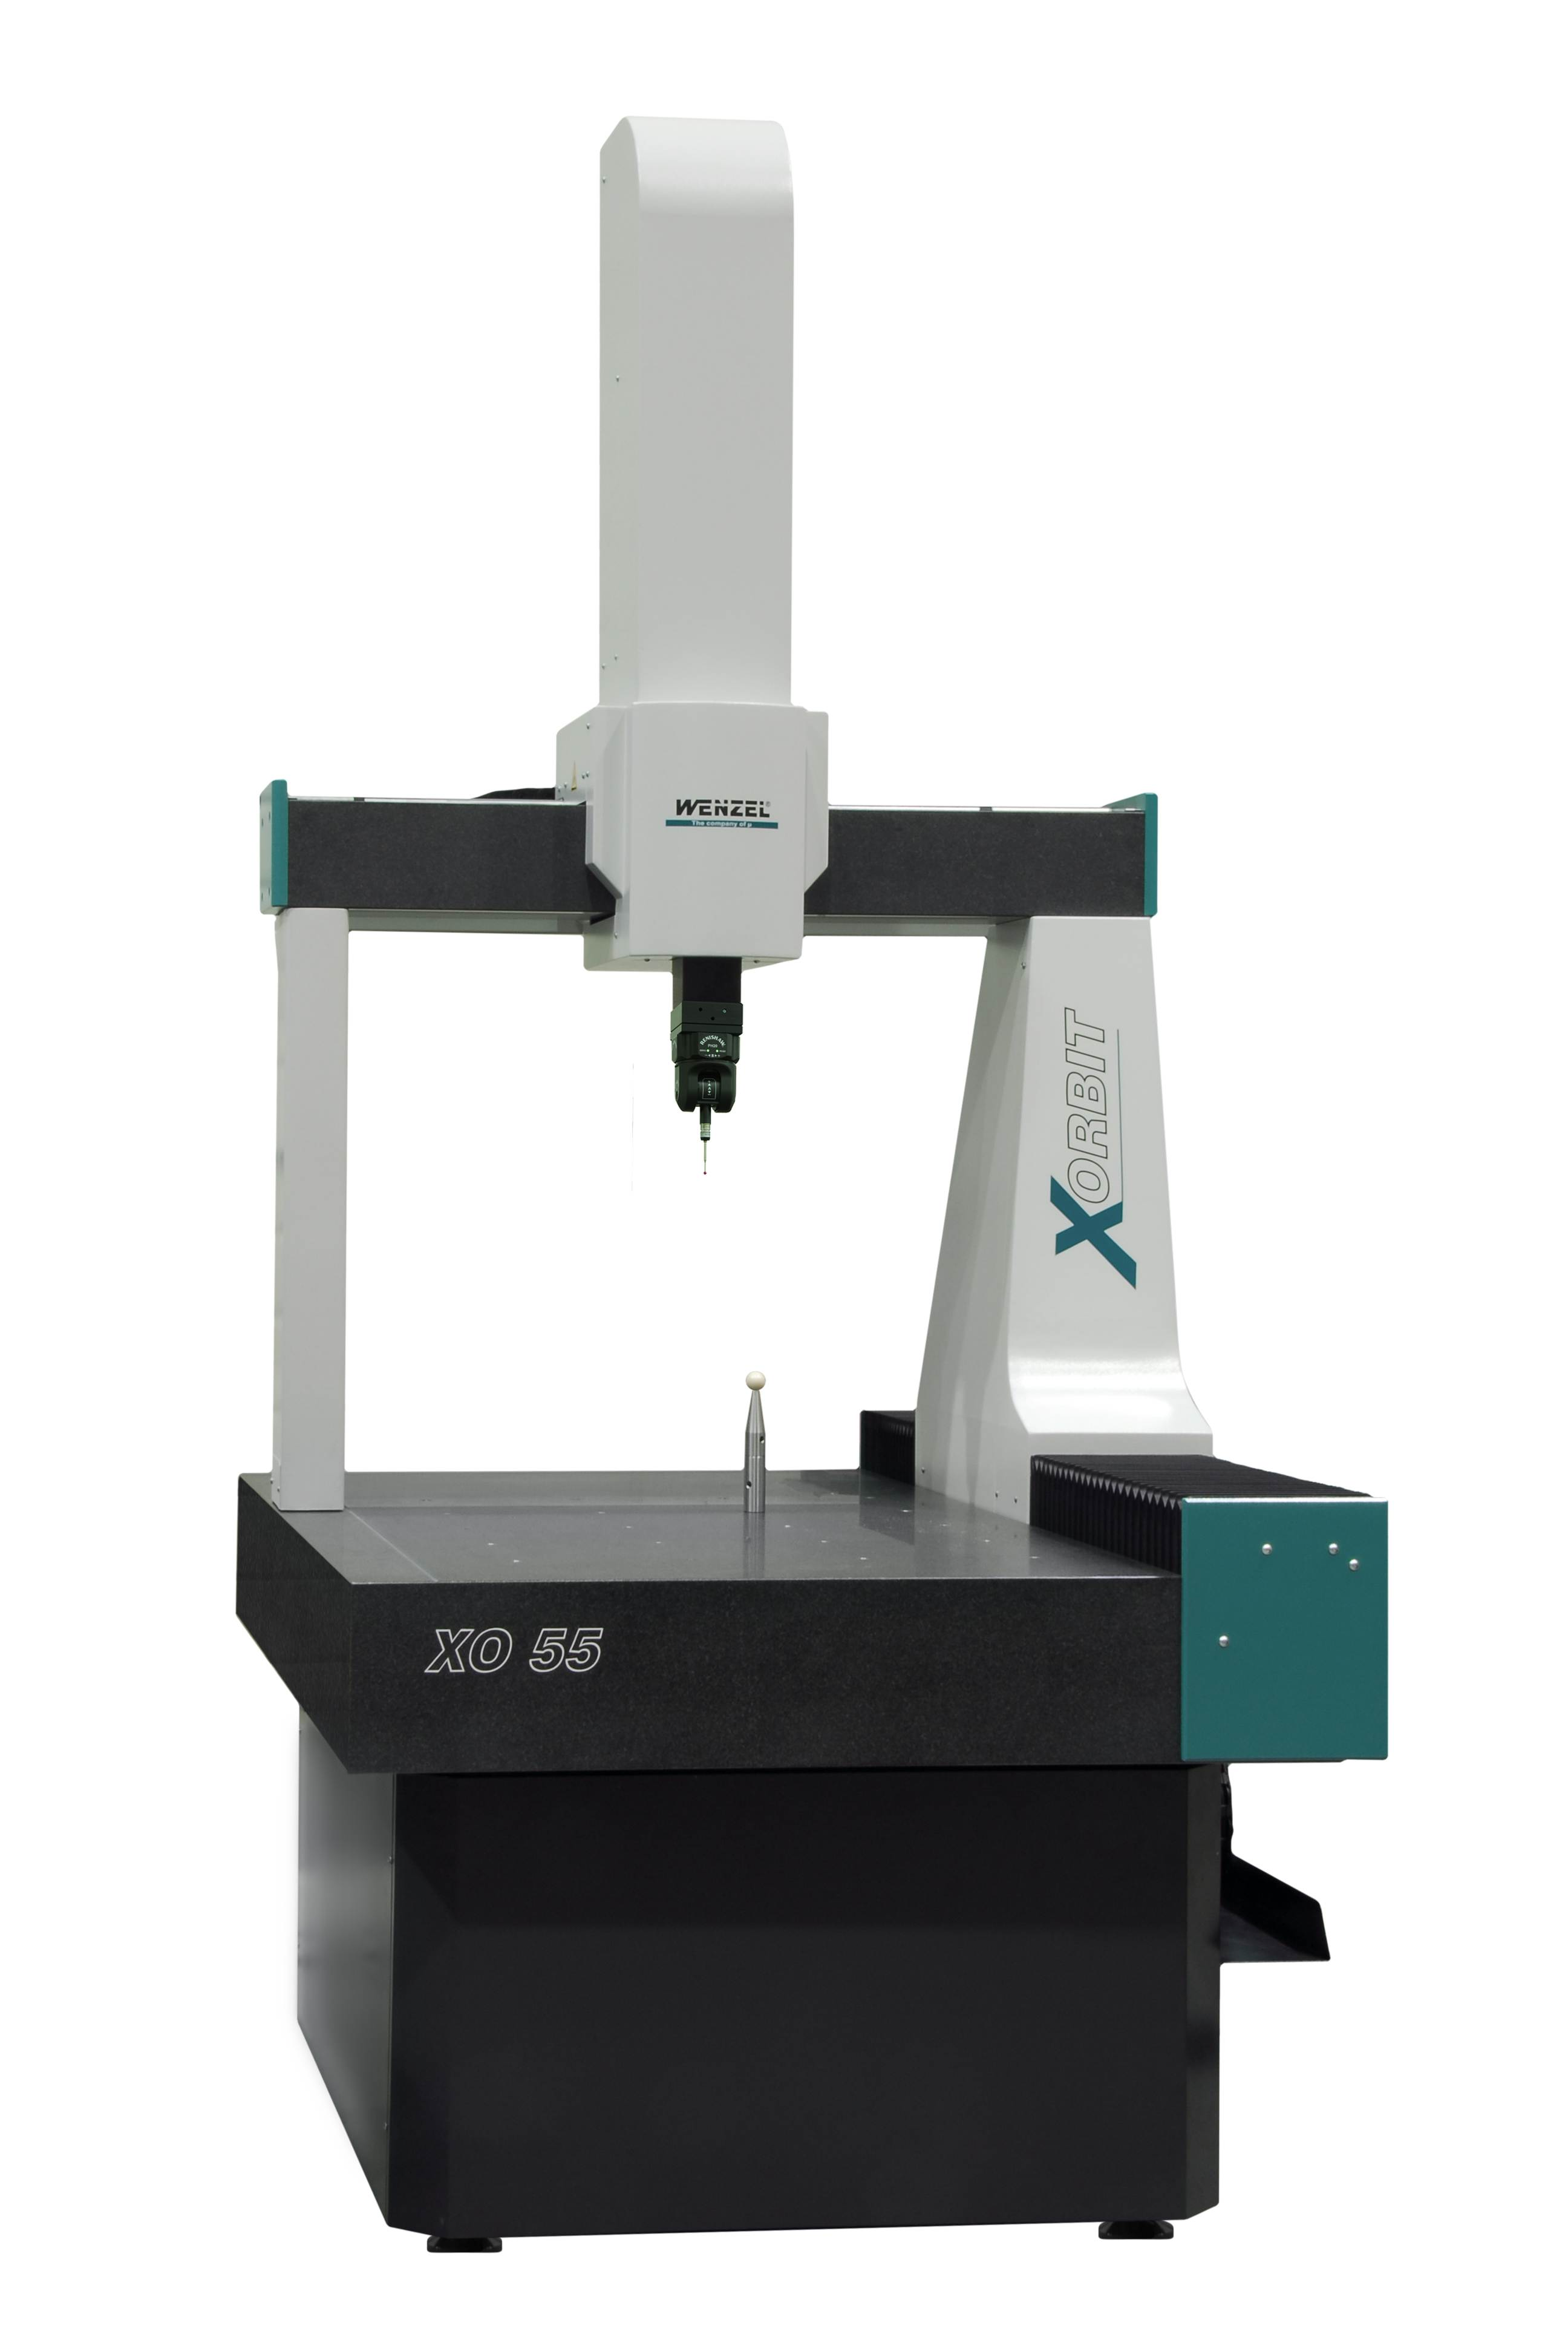
Figura 1. Máquina de medição de coordenadas

Uma tal máquina toca uma superfície com uma sonda e assim coleta coordendadas tridimensionais da mesma.

Uma coleta de dados feita por uma máquina de medição de coordenadas está disponível em ["https://www.lsc.poli.usp.br/hardprobe_01.txt]("https://www.lsc.poli.usp.br/hardprobe_01.txt).

O código abaixo recupera estes pontos e armazena-os em um dataset:

In [8]:
hardprobe=pd.read_csv(io.TextIOWrapper(request.urlopen("https://www.lsc.poli.usp.br/pece_ai/hardprobe_01.txt")), delimiter=';', skiprows=1, names=["desc", "x", "y", "z"])

O dataset ```hardprobe``` contém as colunas ```x```, ```y``` e ```z``` com as coordendas de cada ponto.
Todas as medidas estão em milímetros.

Os pontos da superfície podem ser vistos na figura abaixo.

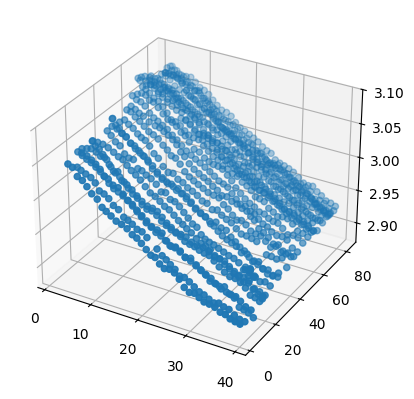

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(hardprobe["x"], hardprobe["y"], hardprobe["z"])

Uma das possíveis medidas de rugosidade de uma superfície é dada pela *raiz quadrada do resíduo médio quadrado*:

\begin{equation}
\sqrt{\frac{1}{n}\sum \left( Y_i - \tilde{Y}_i\right)^2}
\end{equation}

Onde $Y_i$ é um ponto medido na superfície e $\tilde{Y}_i$ é um ponto no plano que melhor aproxima a superfície.

O plano que melhor aproxima a superfície pode ser obtido com decomposição em componentes principais do conjunto de pontos e retendo-se as duas primeiras componentes.

Deste modo, a métrica de rugosidade é a raiz quadrada do *último* autovetor da matriz de covariância dos pontos.

Calcule a rugosidade da superfície medida de acordo com esta métrica usando decomposição em componentes principais (seu resultado deve ficar próximo de 0,006mm).

In [10]:

url = "https://www.lsc.poli.usp.br/pece_ai/hardprobe_01.txt"


hardprobe_df = pd.read_csv(
    io.TextIOWrapper(request.urlopen(url)),
    delimiter=';',
    skiprows=1,
    names=["desc", "x", "y", "z"]
)


pontos_xyz = hardprobe_df[["x", "y", "z"]].values

pca = PCA()

pca.fit(pontos_xyz)

autovalores = pca.explained_variance_
menor_autovalor = autovalores[-1]
rugosidade = np.sqrt(menor_autovalor)


print("--- Cálculo da Rugosidade da Superfície ---\n")
print(f"Os 3 autovalores (variâncias) encontrados são: {autovalores}")
print(f"O menor autovalor, correspondente à variância fora do plano principal, é: {menor_autovalor:.8f}\n")
print(f"A rugosidade calculada (Raiz Quadrada do Menor Autovalor) é:")
print(f"Resultado: {rugosidade:.5f} mm")

--- Cálculo da Rugosidade da Superfície ---

Os 3 autovalores (variâncias) encontrados são: [5.87698182e+02 1.15414303e+02 3.83461876e-05]
O menor autovalor, correspondente à variância fora do plano principal, é: 0.00003835

A rugosidade calculada (Raiz Quadrada do Menor Autovalor) é:
Resultado: 0.00619 mm


*Labeled Faces in the Wild* (LFW) é um banco de dados de fotografias de rostos projetado para estudar o problema do reconhecimento facial. Atualmente, quatro conjuntos diferentes de imagens LFW,  incluindo o original e três tipos diferentes de imagens "alinhadas". De acordo com os pesquisadores, as imagens com alinhamento tipo afunilamento profundo (*deep funneling*) produziram resultados superiores para a maioria dos algoritmos de verificação de rosto em comparação com os outros tipos de imagem. Portanto, o conjunto de dados carregado aqui é essa versão.

<center><img src='https://drive.google.com/uc?export=view&id=1IGeppDQn5xMl8k1uidUjTqahKPT7n0dt' width="400"></center>

<small> Imagem extraída do [link](https://github.com/dribnet/lfw_fuel).

Abaixo, o conjunto de dados de pessoas LFW é carregado. Os principais parâmetros são `min_faces_per_person` e `resize`. O primeiro parâmetro indica o mínimo de imagens que uma pessoa deve ter para ser selecionada para o dataset e o segundo parâmetro indica a proporção na qual a imagem é redimensionada.
```
lfw_people = fetch_lfw_people(resize=1.0)
```

As imagens são $125 \times 94 = 11750$. Você pode, por exemplo,
escolher um `resize` de 0.5, que leva a uma dimensão total de $62\times 47 = 2914$ para cada ponto do espaço (imagem). Além disso, a escolha default  `min_faces_per_person = None` levou a um conjunto de 13233 imagens no total.

Perceba que a variável `lfw_people.images` contém os dados referentes às imagens e a variável `lfw_people.target` contém um número referente à identificação da imagem (0-5748). A conexão entre os números usados na identificação e o nome de cada pessoa é obtida através da variável `lfw_people.target_names`.

A matriz 2D `lfw_people.data` contém o número de linhas equivalente ao número de imagens e o número de colunas equivalente à dimensão (número de características) de cada imagem.

In [11]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(resize=1.0)

O dataset contém  13233 imagens de dimensões  125 por 94
Portanto, o número de características (dimensão) de cada imagem é 125x94 = 11750

Cada uma das imagens tem um número de identificação. Os números estão armazenados em um vetor de dimensão 13233:
[5360 3434 3807 ... 2175  373 2941]

O número direciona a imagem a uma das 5749 pessoas diferentes existentes no dataset. São elas:
['AJ Cook' 'AJ Lamas' 'Aaron Eckhart' ... 'Zumrati Juma' 'Zurab Tsereteli'
 'Zydrunas Ilgauskas']



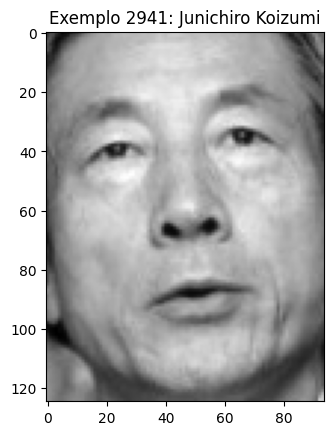


 Todos os dados estão resumidos em uma matriz de 13233 linhas por 11750 colunas.


In [12]:
cont_imagens, altura_lfw, largura_lfw = lfw_people.images.shape
image_shape = (altura_lfw, largura_lfw)
n_classes = lfw_people.target_names.shape[0]

print(f'O dataset contém ',cont_imagens, 'imagens de dimensões ', altura_lfw, 'por', largura_lfw)
print(f'Portanto, o número de características (dimensão) de cada imagem é {altura_lfw}x{largura_lfw} = {lfw_people.data.shape[1]}\n')

print(f'Cada uma das imagens tem um número de identificação. Os números estão armazenados em um vetor de dimensão {lfw_people.target.shape[0]}:')
print(f'{lfw_people.target}\n' )

print(f'O número direciona a imagem a uma das {n_classes} pessoas diferentes existentes no dataset. São elas:')
target_names = lfw_people.target_names
print(f'{target_names}\n')

plt.imshow(lfw_people.images[cont_imagens-1], cmap='gray')
name_ex = lfw_people.target_names[lfw_people.target[cont_imagens-1]]

plt.title('Exemplo '+str(lfw_people.target[cont_imagens-1])+': '+str(name_ex))
plt.show()


print(f'\n Todos os dados estão resumidos em uma matriz de {lfw_people.data.shape[0]} linhas por {lfw_people.data.shape[1]} colunas.')

Junichiro Koizumi foi um político japonês que serviu como Primeiro-Ministro do Japão de 2001 a 2006. Ele é conhecido por suas políticas reformistas e estilo de liderança carismático. Koizumi nasceu em 8 de janeiro de 1942, em Yokosuka, na província de Kanagawa. Ele ingressou na política seguindo os passos de seu pai e avô, ambos políticos influentes.:

In [13]:
for (i,j) in zip(range(len(target_names)),target_names):
  if j == "Roberto Carlos":
    print(i,j)
  if j == "Tony Blair":
    print(i,j)
  if j == "Halle Berry":
    print(i,j)
  if j == "Pele":
    print(i,j)
  if j == "Naomi Campbell":
    print(i,j)
  if j == "Ariel Sharon":
    print(i,j)
  if j == "Colin Powell":
    print(i,j)
  if j == "Margaret Thatcher":
    print(i,j)
  if j == "Gisele Bundchen":
    print(i,j)
  if j == "Tom Cruise":
    print(i,j)

373 Ariel Sharon
1047 Colin Powell
1918 Gisele Bundchen
2021 Halle Berry
3486 Margaret Thatcher
4010 Naomi Campbell
4314 Pele
4721 Roberto Carlos
5406 Tom Cruise
5458 Tony Blair


Veja que o dataset é composto das mais diversas faces...

<center><img src='https://drive.google.com/uc?export=view&id=1894U8zqrngytKUesDT4Uxuu_Q1SQPfqh' width="900"></center>

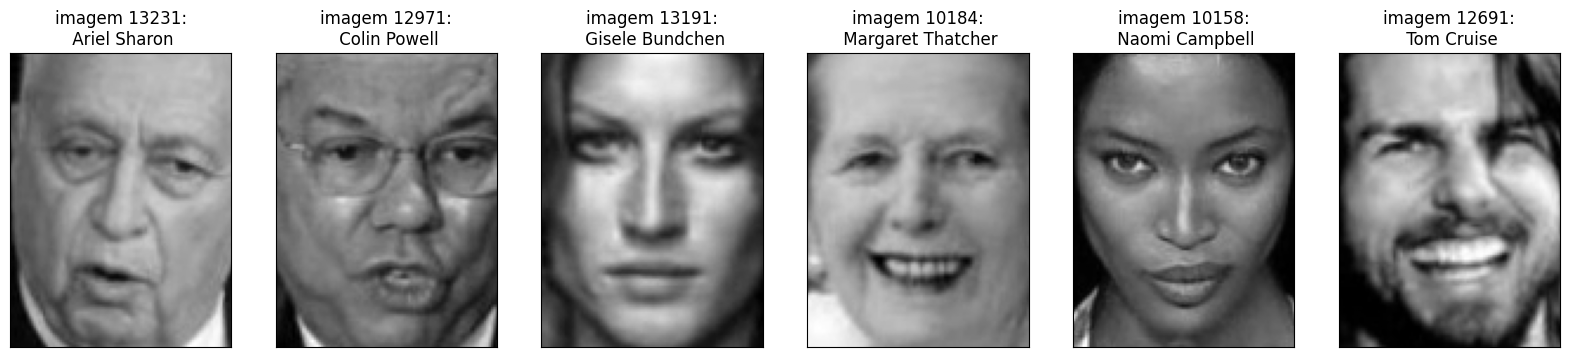

In [14]:
plt.figure(figsize=(20,120))
face_numbers = [373,1047,1918,3486,4010,5406]
for i in range(len(face_numbers)):
    plt.subplot(1,6,i+1)
    for j in range(len(lfw_people.target)):
      if lfw_people.target[j] == face_numbers[i]:
        plt.imshow(lfw_people.images[j], cmap='gray')
        plt.title('imagem '+str(j)+':\n '+str(target_names[lfw_people.target[j]]))
        plt.xticks(())
        plt.yticks(())
plt.show()

Veja outros exemplos...

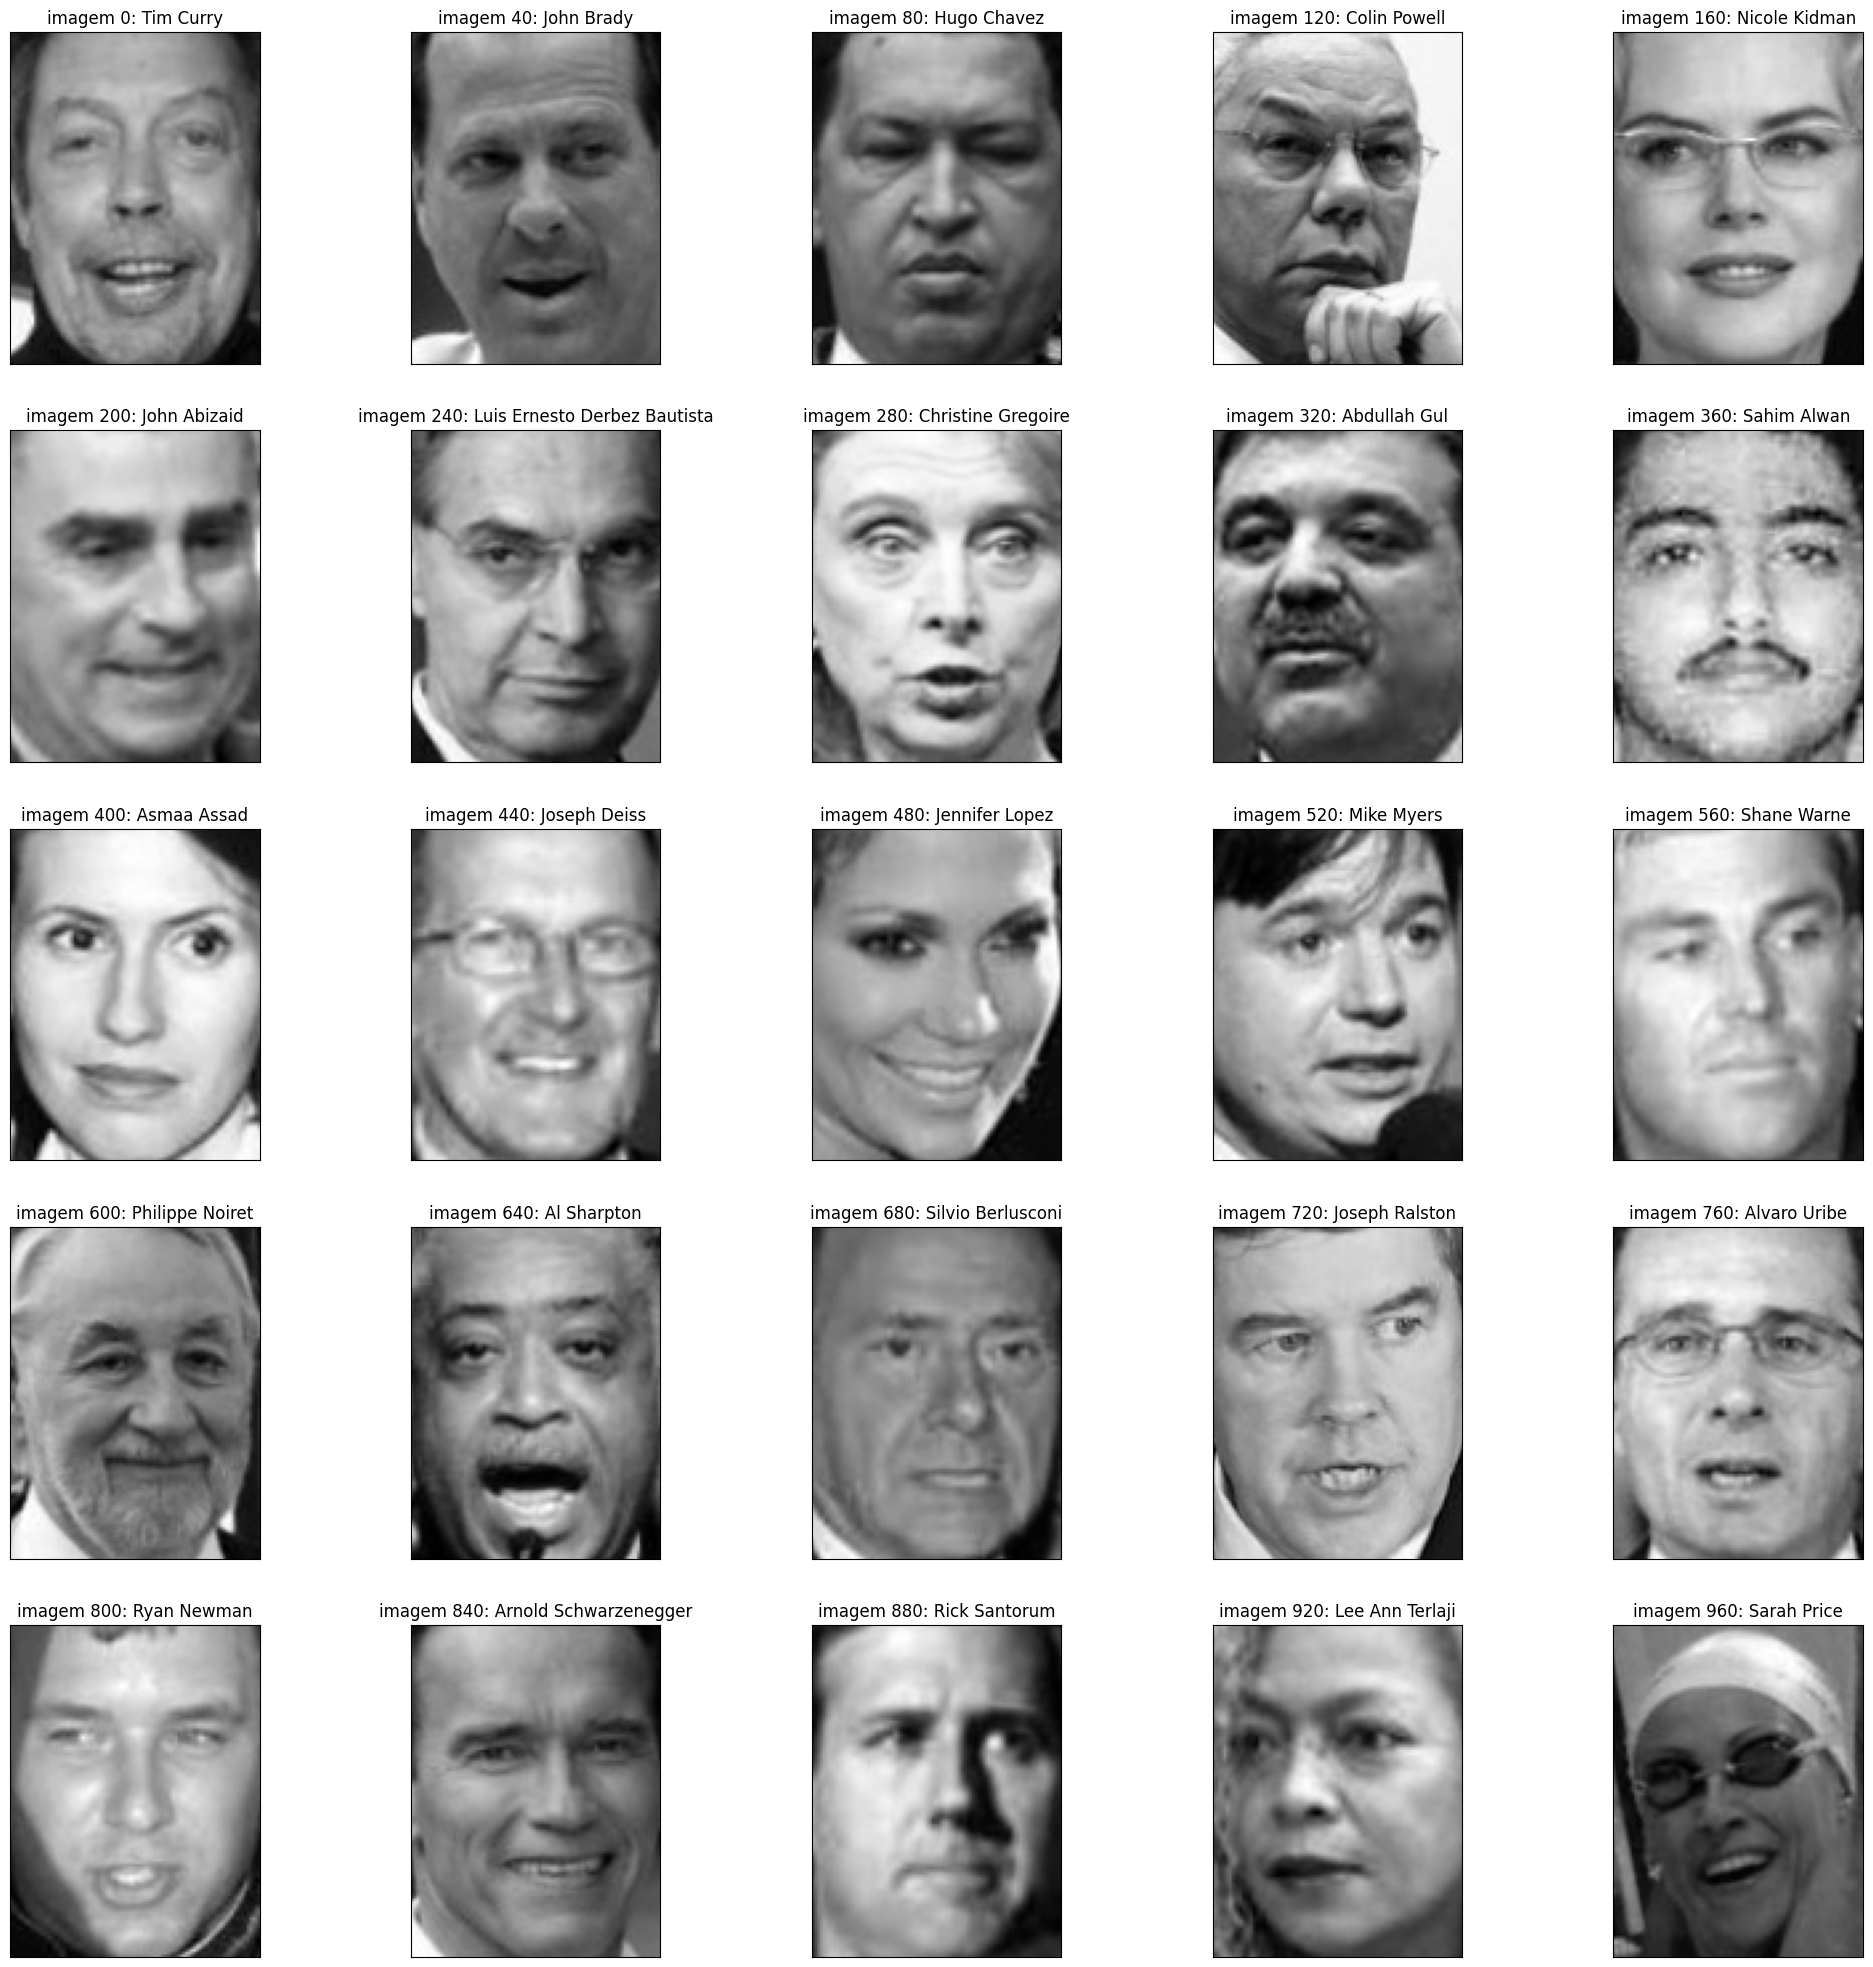

In [15]:
plt.figure(figsize=(25,25))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(lfw_people.images[i*40], cmap='gray')
    plt.title('imagem '+str(i*40)+': '+str(target_names[lfw_people.target[i*40]]))
    plt.xticks(())
    plt.yticks(())
plt.show()

## Eigenfaces

Eigenfaces é um processo para representar faces humanas, tradicionalmente para reconhecimento.
O princípio por trás do Eigenfaces é gerar uma representação de imagens de rostos baseada em componentes principais de uma amostra grande o suficiente de rostos.

A hipótese subjacente é que a amostra tem características suficientes para representar de forma fidedigna mesmo rostos que não pertencem a ela.

Como visto, as imagens são representadas por matrizes.
Estas matrizes serão "linearizadas" em vetores para serem usadas como variáveis explicativas (usando ```reshape```).

A totalidade de imagens será colocada na variável ```ìmages```.

Finalmente, iremos dividir esta variável em um conjunto de "treinamento" em ```X_train``` e um de "testes" em ```X_test``` em uma divisão de 90%/10%.
Os rótulos também serão divididos, mas não serão relevantes para nossa atividade aqui.



In [16]:
from sklearn.model_selection import train_test_split
np.random.seed(10)
# Constroi vetores de imagens e rótulos (estes último)
images = []
labels = []
for i, t in zip(lfw_people.images, lfw_people.target):
  images.append(i.reshape(-1)) # lineariza matrizes
  labels.append(t)
images = np.array(images)
labels = np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1)

print(f"Dimensões de images:{images.shape}")
print(f"Dimensões de X_train:{X_train.shape}")
print(f"Dimensões de X_test:{X_test.shape}")

Dimensões de images:(13233, 11750)
Dimensões de X_train:(11909, 11750)
Dimensões de X_test:(1324, 11750)


a) Faça a decomposição espectral do conjunto de "treinamento" com 1000 componentes (!!!). Note que esta quantidade de componentes é _excessiva_ para propósitos de identificação, e que o cálculo dessa decomposição pode levar alguns minutos.
Atribua o resultado da operação ```fit``` à variável ```eigenfaces```.

In [17]:
from sklearn.decomposition import PCA

# Criar o objeto PCA com 1000 componentes
pca = PCA(n_components=1000, whiten=True, random_state=42)

eigenfaces = pca.fit(X_train)

print("Decomposição concluída!")
print(f"\nNúmero de componentes: {eigenfaces.n_components_}")
print(f"Forma dos componentes: {eigenfaces.components_.shape}")
print(f"Variância explicada total: {np.sum(eigenfaces.explained_variance_ratio_):.4f}")

Decomposição concluída!

Número de componentes: 1000
Forma dos componentes: (1000, 11750)
Variância explicada total: 0.9917


Mesmo considerando que o conjunto original tem mais de 10 mil variáveis, essas mil componentes devem capturar mais de 99% da variância da amostra.
Verifique isso executando esta célula:

In [18]:
print(f"Dimensão original: {X_train.shape[-1]}")
print(f"Variância explicada com 1000 componentes: {float(eigenfaces.explained_variance_ratio_.sum())}")

Dimensão original: 11750
Variância explicada com 1000 componentes: 0.9916884303092957


*A* imagem média está armazenada no atributo ```mean_```. Podemos mostrá-la com o comando:

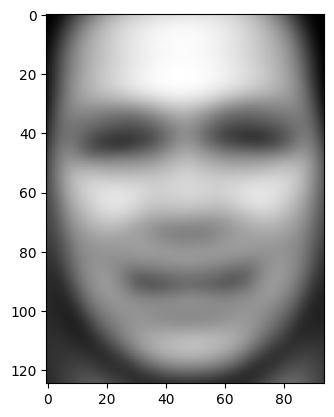

In [19]:
plt.imshow(eigenfaces.mean_.reshape(image_shape), cmap='gray')

Podemos verificar a capacidade da decomposição em representar imagens de *fora* da base de treinamento.
Vamos pegar a primeira (de forma arbitrária, qualquer uma deveria funcionar) imagem do conjunto de testes e colocá-la na variável ```image_test```.
Podemos mostrar essa imagem:

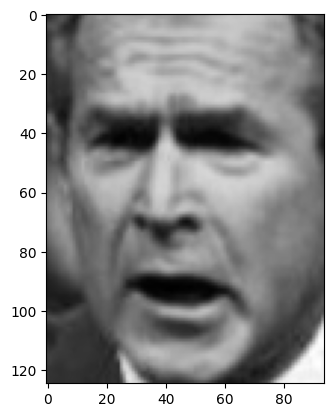

In [20]:
image_test = X_test[0]
plt.imshow(image_test.reshape(image_shape), cmap='gray')

b) Projete a imagem no espaço de Eigenfaces com o comando ```transform```.
Mostre que o resultado é um vetor de mil componentes.
Em seguida, reconstrua a imagem com o comando ```inverse_transform```.
Mostre a imagem reconstruída e compare-a com a original.
Lembre-se que esta imagem está *fora* do conjunto de imagens usadas para gerar as Eigenfaces!

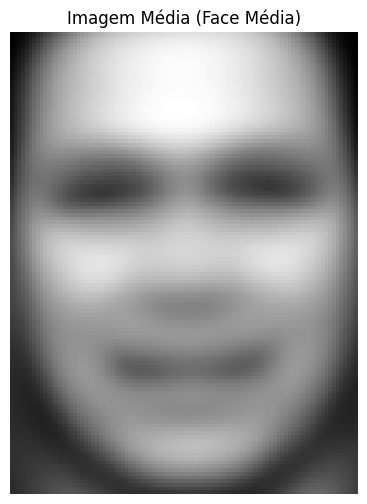

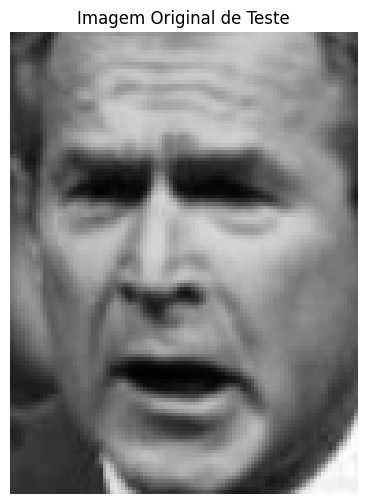

Forma da imagem transformada: (1, 1000)
Número de componentes: 1000


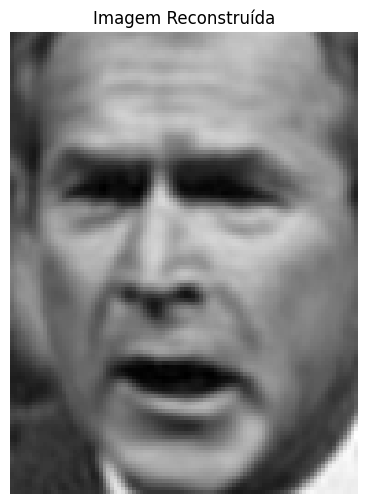

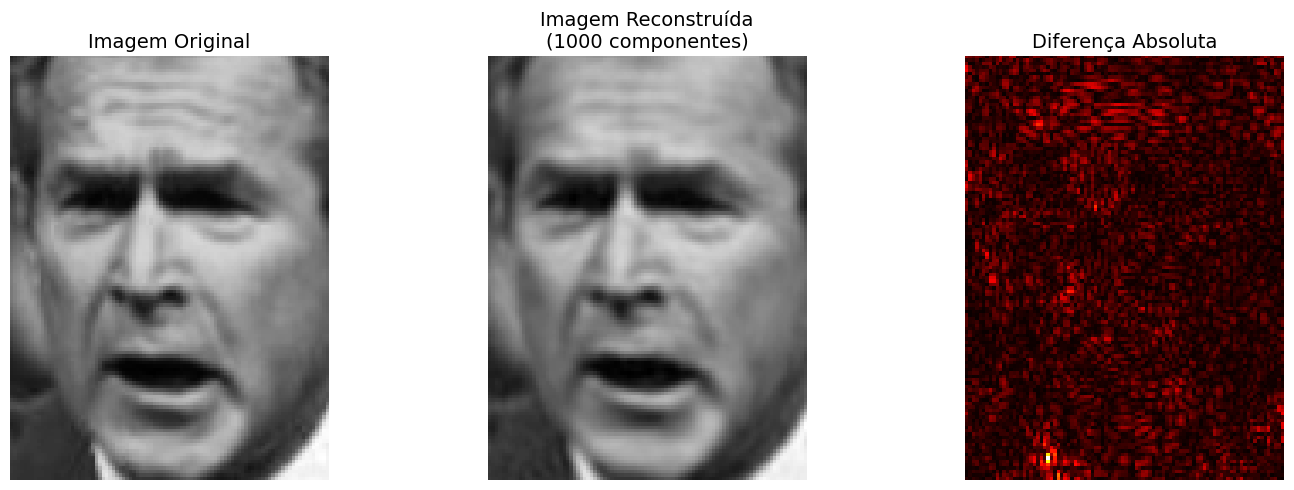

In [25]:
# Mostrar a imagem média
plt.figure(figsize=(6, 6))
plt.imshow(eigenfaces.mean_.reshape(image_shape), cmap='gray')
plt.title('Imagem Média (Face Média)')
plt.axis('off')
plt.show()

# Pegar a primeira imagem do conjunto de testes
image_test = X_test[0]

# Mostrar a imagem original
plt.figure(figsize=(6, 6))
plt.imshow(image_test.reshape(image_shape), cmap='gray')
plt.title('Imagem Original de Teste')
plt.axis('off')
plt.show()

image_test_transformed = eigenfaces.transform([image_test])

# Verificar que o resultado é um vetor de 1000 componentes
print(f"Forma da imagem transformada: {image_test_transformed.shape}")
print(f"Número de componentes: {image_test_transformed.shape[1]}")

# Reconstruir a imagem a partir das projeções
image_test_reconstructed = eigenfaces.inverse_transform(image_test_transformed)

# Mostrar a imagem reconstruída
plt.figure(figsize=(6, 6))
plt.imshow(image_test_reconstructed[0].reshape(image_shape), cmap='gray')
plt.title('Imagem Reconstruída')
plt.axis('off')
plt.show()

# Comparar original e reconstruída lado a lado
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Imagem original
axes[0].imshow(image_test.reshape(image_shape), cmap='gray')
axes[0].set_title('Imagem Original', fontsize=14)
axes[0].axis('off')

# Imagem reconstruída
axes[1].imshow(image_test_reconstructed[0].reshape(image_shape), cmap='gray')
axes[1].set_title('Imagem Reconstruída\n(1000 componentes)', fontsize=14)
axes[1].axis('off')

# Diferença absoluta
difference = np.abs(image_test - image_test_reconstructed[0])
axes[2].imshow(difference.reshape(image_shape), cmap='hot')
axes[2].set_title('Diferença Absoluta', fontsize=14)
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Calcular métricas de erro
mse = np.mean((image_test - image_test_reconstructed[0])**2)
psnr = 20 * np.log10(1.0 / np.sqrt(mse)) if mse > 0 else float('inf')





O objetivo deste exercício é demonstrar a capacidade de métodos não-supervisionados de *reconstruir* dados faltantes de uma amostra parcial.

Vamos fazer um "furo" na imagem de 14x14 pixels no seu centro:

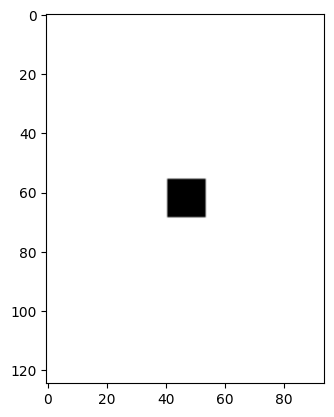

In [26]:
pattern = []
n_coefs = altura_lfw*largura_lfw
furo_matriz = []
coeficientes_mantidos = []
for i in range(n_coefs):
  row = np.zeros(n_coefs)
  row[i] = 1
  x = i//94
  y = i%94
  if x>55 and x < 69 and y > 40 and y < 54:
    pattern.append(0)
  else:
    pattern.append(1)
    furo_matriz.append(row)
    coeficientes_mantidos.append(i)
pattern = np.array(pattern)
furo_matriz = np.array(furo_matriz)
plt.imshow(pattern.reshape(image_shape), cmap='gray')

O "furo" corresponde à remoção de coeficientes.
A matriz ```furo_matriz``` é uma matriz que, quando pré-multiplicada pelo vetor de coeficientes de uma imagem, "remove" os componentes correspondentes aos pixels que estão no furo.
Se pré-multiplicarmos novamente o resultado pela sua transposta, obtemos a imagem com todos os coeficientes na posição do furo *zerados*:

Dimensões de furo_matriz: (11581, 11750)
Dimensões da imagem original: (11750,)
Dimensões da imagem sem pixels do furo: (11581,)


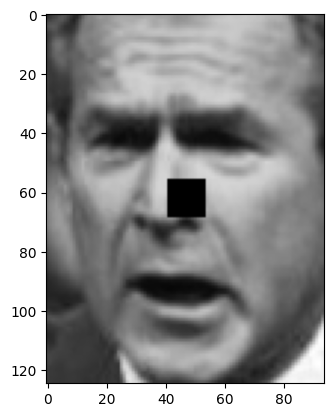

In [27]:
print(f"Dimensões de furo_matriz: {furo_matriz.shape}")
imagem_sem_coeficientes_do_furo = furo_matriz@image_test
print(f"Dimensões da imagem original: {image_test.shape}")
print(f"Dimensões da imagem sem pixels do furo: {imagem_sem_coeficientes_do_furo.shape}")
imagem_furada = furo_matriz.T@imagem_sem_coeficientes_do_furo
plt.imshow(imagem_furada.reshape(image_shape), cmap='gray')

Nota-se que uma porção significativa da imagem foi destruída por este processo!
Vamos tentar reconstruí-la usando análise de componentes principais.

Como visto em aula, a hipótese na análise de componentes principais é que as variáveis seguem uma distribuição multi-Gaussiana cuja função densidade de probabilidade é dada por:

\begin{equation}
p(x) = \eta \mbox{exp}\left(-\frac{\left(x - \mu \right)^T \Sigma^{-1} \left(x - \mu \right) }{2}\right)
\end{equation}

Onde $\mu$ é o valor médio, $\Sigma$ é a matriz de covariância e $\eta$ é um fator de normalização (igual a $1/\sqrt{(2\pi)^{k} \mbox{det}(\Sigma) }$, onde $k$ é a dimensão de $x$).

Considere uma imagem original representada pelo vetor $i$.

A imagem "furada", ou seja, sem os coeficientes correspondentes ao furo, é dada por $b = A i$, onde $A$ é a matriz que "remove" os coeficientes, correspondente à variável ```furo_matriz```.
Note que o vetor $b$ está armazenado na variável ```imagem_sem_coeficientes_do_furo```.


Neste caso, toda imagem $x$ que é uma possível reconstrução obedece à equação $A x = A i = b$.
Isso na prática equivale a dizer que todos os pixels que estão fora do furo na imagem imagem reconstruída devem ser iguais aos da imagem original.

Naturalmente, é impossível resolver o sistema linear $A x = b$, pois a matriz $A$ tem mais colunas do que linhas, correspondente à informação que foi destruída no furo.

Por outro lado, considerando a hipótese de PCA, podemos descobrir qual a imagem de *máxima verissimilhança* que obedece a esta equação.

Observando a distribuição de probabilidades acima, isso equivale a resolver o problema de otimização:

\begin{equation}
\begin{matrix} \mbox{Min} & \frac{1}{2}\left(x - \mu \right)^T \Sigma^{-1} \left(x - \mu \right) \\
\mbox{tal que} & A x = b
\end{matrix}
\end{equation}

Este é um problema que pode ser resolvido pelo método dos multiplicadores de Lagrange:

$L(x, \lambda) = \frac{1}{2}\left(x - \mu \right)^T \Sigma^{-1} \left(x - \mu \right) - \lambda^T (A x - b)$

Impondo-se a estacionariedade em relação a x,

$\nabla_x L = \Sigma^{-1} (x - \mu) - A^T \lambda = 0$

Ou seja,

$\Sigma^{-1} (x - \mu) = A^T \lambda$

Pré-multiplicando-se ambos os lados por $\Sigma$,

$x - \mu = A^T \lambda \Rightarrow x = \Sigma A^T \lambda + \mu$

Substituindo-se esta expressão para $x$ em $Ax = b$,

$(A \Sigma A^T) \lambda = b - A \mu$

A matriz $(A \Sigma A^T)$ é a matriz $\Sigma$ da qual foram suprimidas as colunas e as linhas correspondentes aos coeficientes do "furo".
Note que o vetor $A \mu$ é o vetor da imagem média "furado".

Este sistema pode ser resolvido em $\lambda$ e a imagem pode ser reconstruída com a expressão $x = \Sigma A^T \lambda + \mu$.

c) Usando o exposto acima, reconstrua a imagem "mais provável" a partir do vetor ```imagem_sem_coeficientes_do_furo```.

Sugestões:

* a matriz de covariância $\Sigma$ pode ser obtida a partir da chamada ao método ```get_covariance()``` do objeto ```eigenfaces```.

* A matriz $(A \Sigma A^T)$ pode ser obtida pelo produto tradicional de matrizes densas com o operador ```@```. Mas este é um processo *lento*. Lembre-se que a matriz $\Sigma$ tem mais de 10000 por 10000 coeficientes.
Por outro lado, $A$ não é uma matriz qualquer! Como dito, $(A \Sigma A^T)$ corresponde a $\Sigma$ sem as linhas e colunas dos coeficientes no furo.
A sequência ```coeficientes_mantidos``` contém os índices de todos os coeficientes que *não* estão no furo. Use esta sequência e os métodos de indexação de numpy para retirar as linhas e colunas indesejadas de $\Sigma$.

* Para resolver o sistema $(A \Sigma A^T) \lambda = b - A \mu$, use ```np.linalg.solve(a, b)```, onde ```a``` é a matriz do lado esquerdo e ```b``` o vetor do lado direito. Note que mesmo com a redução, este é um sistema de 1000 coeficientes e isso leva algum tempo.

Mostre a imagem resultante e compare-a com a original.
Observe que *nenhuma* informação sob o "furo" é usada nesta reconstrução!





Dimensões da matriz de covariância Sigma: (11750, 11750)
Dimensões do vetor média mu: (11750,)
Dimensões de A*mu: (11581,)
Dimensões do lado direito: (11581,)
Calculando A*Sigma*A^T de forma eficiente...
Dimensões de A*Sigma*A^T: (11581, 11581)
Resolvendo o sistema linear...
Dimensões de lambda: (11581,)
Dimensões da imagem reconstruída: (11750,)


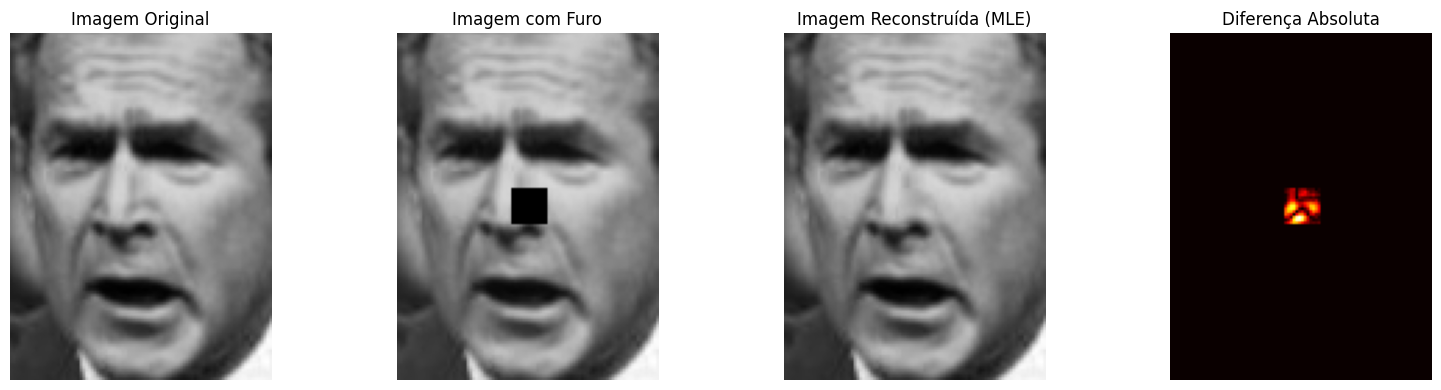


Métricas de erro:
MSE total: 0.000061
MSE na região do furo: 0.004238
MSE fora do furo: 0.000000

Pixels fora do furo preservados perfeitamente: True


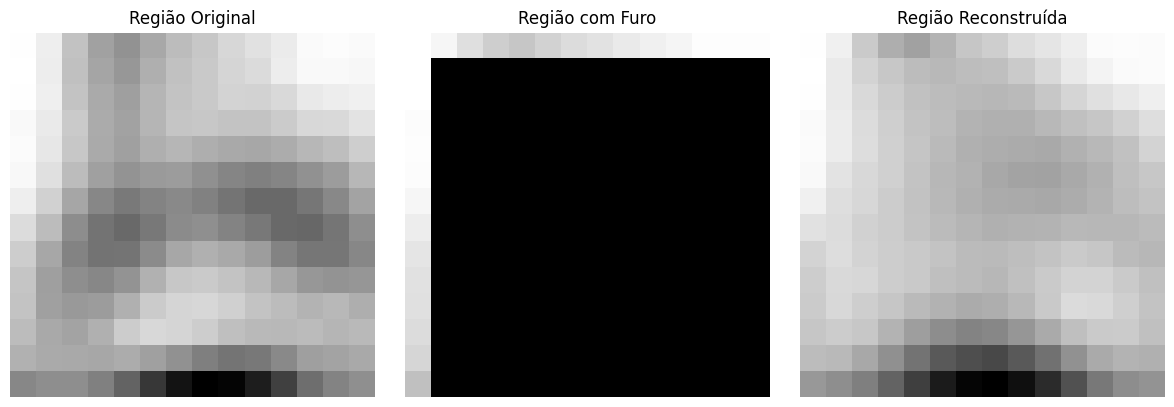

Estatísticas dos valores de pixel na região do furo:
Original - Min: 0.388, Max: 0.817, Média: 0.676
Reconstruída - Min: 0.319, Max: 0.817, Média: 0.683


In [28]:
# Obter a matriz de covariância e a média
Sigma = eigenfaces.get_covariance()
mu = eigenfaces.mean_

print(f"Dimensões da matriz de covariância Sigma: {Sigma.shape}")
print(f"Dimensões do vetor média mu: {mu.shape}")

# Calcular A*mu (média "furada")
A_mu = furo_matriz @ mu
print(f"Dimensões de A*mu: {A_mu.shape}")

# Calcular o lado direito da equação: b - A*mu
b = imagem_sem_coeficientes_do_furo
lado_direito = b - A_mu
print(f"Dimensões do lado direito: {lado_direito.shape}")

# Calcular A*Sigma*A^T de forma eficiente
# Em vez de fazer o produto completo, vamos extrair apenas as linhas e colunas necessárias
print("Calculando A*Sigma*A^T de forma eficiente...")

# Extrair submatriz de Sigma usando os coeficientes mantidos
A_Sigma_AT = Sigma[np.ix_(coeficientes_mantidos, coeficientes_mantidos)]
print(f"Dimensões de A*Sigma*A^T: {A_Sigma_AT.shape}")

# Resolver o sistema linear
print("Resolvendo o sistema linear...")
lambda_sol = np.linalg.solve(A_Sigma_AT, lado_direito)
print(f"Dimensões de lambda: {lambda_sol.shape}")

# Reconstruir a imagem: x = Sigma * A^T * lambda + mu
# Primeiro, calcular Sigma * A^T * lambda
Sigma_AT_lambda = Sigma[:, coeficientes_mantidos] @ lambda_sol
x_reconstruido = Sigma_AT_lambda + mu

print(f"Dimensões da imagem reconstruída: {x_reconstruido.shape}")

# Visualizar os resultados
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Imagem original
axes[0].imshow(image_test.reshape(image_shape), cmap='gray')
axes[0].set_title('Imagem Original')
axes[0].axis('off')

# Imagem com furo
axes[1].imshow(imagem_furada.reshape(image_shape), cmap='gray')
axes[1].set_title('Imagem com Furo')
axes[1].axis('off')

# Imagem reconstruída
axes[2].imshow(x_reconstruido.reshape(image_shape), cmap='gray')
axes[2].set_title('Imagem Reconstruída (MLE)')
axes[2].axis('off')

# Diferença entre original e reconstruída
diferenca = np.abs(image_test - x_reconstruido)
axes[3].imshow(diferenca.reshape(image_shape), cmap='hot')
axes[3].set_title('Diferença Absoluta')
axes[3].axis('off')

plt.tight_layout()
plt.show()

# Calcular métricas de erro
mse_total = np.mean((image_test - x_reconstruido)**2)
mse_furo = np.mean((image_test[pattern == 0] - x_reconstruido[pattern == 0])**2)
mse_fora_furo = np.mean((image_test[pattern == 1] - x_reconstruido[pattern == 1])**2)

print(f"\nMétricas de erro:")
print(f"MSE total: {mse_total:.6f}")
print(f"MSE na região do furo: {mse_furo:.6f}")
print(f"MSE fora do furo: {mse_fora_furo:.6f}")

# Verificar que os pixels fora do furo são preservados
pixels_preservados = np.allclose(
    x_reconstruido[pattern == 1],
    image_test[pattern == 1],
    rtol=1e-10
)
print(f"\nPixels fora do furo preservados perfeitamente: {pixels_preservados}")

# Visualizar apenas a região do furo
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Extrair apenas a região do furo
x_min, x_max = 55, 69
y_min, y_max = 40, 54

# Região original
regiao_original = image_test.reshape(image_shape)[x_min:x_max, y_min:y_max]
axes[0].imshow(regiao_original, cmap='gray')
axes[0].set_title('Região Original')
axes[0].axis('off')

# Região com furo (zeros)
regiao_furada = imagem_furada.reshape(image_shape)[x_min:x_max, y_min:y_max]
axes[1].imshow(regiao_furada, cmap='gray')
axes[1].set_title('Região com Furo')
axes[1].axis('off')

# Região reconstruída
regiao_reconstruida = x_reconstruido.reshape(image_shape)[x_min:x_max, y_min:y_max]
axes[2].imshow(regiao_reconstruida, cmap='gray')
axes[2].set_title('Região Reconstruída')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Estatísticas da reconstrução
print("Estatísticas dos valores de pixel na região do furo:")
print(f"Original - Min: {regiao_original.min():.3f}, Max: {regiao_original.max():.3f}, Média: {regiao_original.mean():.3f}")
print(f"Reconstruída - Min: {regiao_reconstruida.min():.3f}, Max: {regiao_reconstruida.max():.3f}, Média: {regiao_reconstruida.mean():.3f}")